In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly
from plotly.graph_objs import *

In [2]:
rent = pd.read_csv('../OPENDATA_RENTAL_ZONE_CALL_A_BIKE.csv', sep=';')

In [3]:
rent.head()

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
0,354,Standort,Münchner Freiheit,88001308.0,normal,München,Deutschland,"11,586111110000000","48,161944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1,388,Standort,Ostbahnhof,88001662.0,normal,München,Deutschland,"11,604444440000000","48,128611110000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
2,499,Standort,DB_MobilityCenter,88002897.0,normal,München,Deutschland,NaN,NaN,Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
3,1532,Standort,Stiglmaierplatz,88006552.0,normal,München,Deutschland,"11,558888890000000","48,146944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
4,1559,Standort,DB_MobilityCenter,88006834.0,normal,München,Deutschland,"11,575277780000000","48,160277780000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike


In [4]:
# for i in range(len(lat)):
#     lat[i] = '.'.join(lat[i].split(',')).rstrip('0')

In [5]:
country = rent['COUNTRY'].unique()
print(country)

['Deutschland' 'Schweiz']


In [6]:
D = rent[rent['COUNTRY']=='Deutschland']
S = rent[rent['COUNTRY']=='Schweiz']

In [7]:
city_D = D['CITY'].unique()
city_S = S['CITY'].unique()

In [8]:
city_count_D = {}
for city in city_D:
    city_count_D[city] = len(D[D['CITY']==city])
print(city_count_D)

{'Baden-Baden': 7, 'Troisdorf': 3, 'Wiesbaden': 16, 'Erlangen': 1, 'Mainz': 1, 'Heidelberg': 1, 'Oberhausen': 1, 'Bremen': 1, 'Göttingen': 1, 'Hannover': 1, 'Ingolstadt': 1, 'Halle': 3, 'Magdeburg': 1, 'Rostock': 1, 'Bamberg': 1, 'Karlsruhe': 2, 'Fulda': 1, 'Hennef': 1, 'Lübeck': 1, 'Oldenburg (Oldb)': 1, 'Marburg': 22, 'Rüsselsheim': 8, 'Bielefeld': 1, 'Freiburg': 1, 'Flugh. Frankfurt': 2, 'Mannheim': 1, 'Düsseldorf': 1, 'Kiel': 5, 'Hamburg': 207, 'Würzburg': 1, 'Stuttgart': 44, 'München': 88, 'Aschaffenburg': 1, 'Weimar': 1, 'Braunschweig': 1, 'Darmstadt': 41, 'Kaiserslautern': 1, 'Saarbrücken': 1, 'Köln': 184, 'Gütersloh': 1, 'Kassel': 58, 'Frankfurt am Main': 323, 'Freiham': 1, 'Bonn': 1, 'Hanau': 1, 'Warnemünde': 1}


In [9]:
city_count_S = {}
for city in city_S:
    city_count_S[city] = len(S[S['CITY']==city])
print(city_count_S)

{'Sion': 1, 'Davos': 1, 'Genf': 1, 'Chur': 1, 'Zürich': 1, 'Lausanne': 1, 'Thun': 1, 'Göschenen': 1, 'Grindelwald': 1, 'Spiez': 1, 'Brigg': 1, 'Zermatt': 1, 'Biel': 1, 'Interlaken': 1, 'Andermatt': 1, 'Lugano': 1, 'St. Gallen': 1, 'Winterthur': 1, 'Bellinzona': 1}


In [10]:
city_D_name = []
city_D_num = []
for key, val in city_count_D.items():
    city_D_name.append(key)
    city_D_num.append(val)

In [11]:
city_S_name = []
city_S_num = []
for key, val in city_count_S.items():
    city_S_name.append(key)
    city_S_num.append(val)

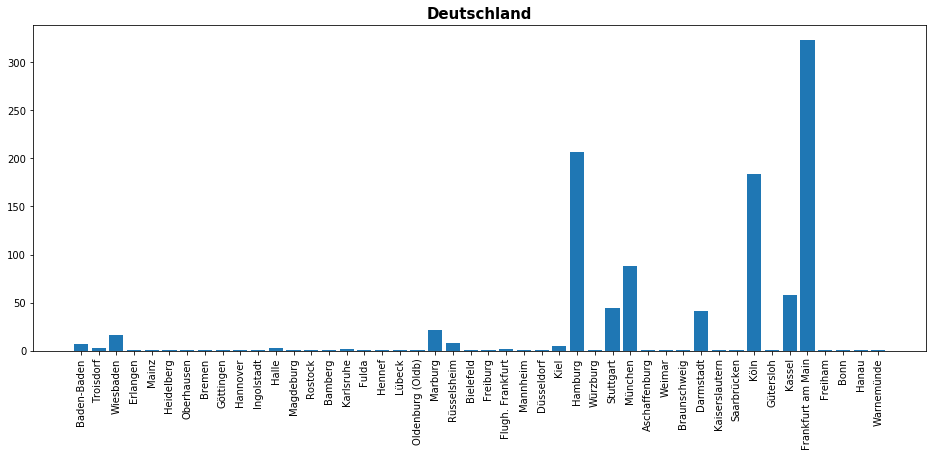

In [12]:
x_plot = np.arange(len(city_D_num))
plt.figure(figsize=(16,6))
plt.title('Deutschland', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_D_num)
plt.xticks(x_plot+1, city_D_name, rotation = 'vertical')
plt.show()

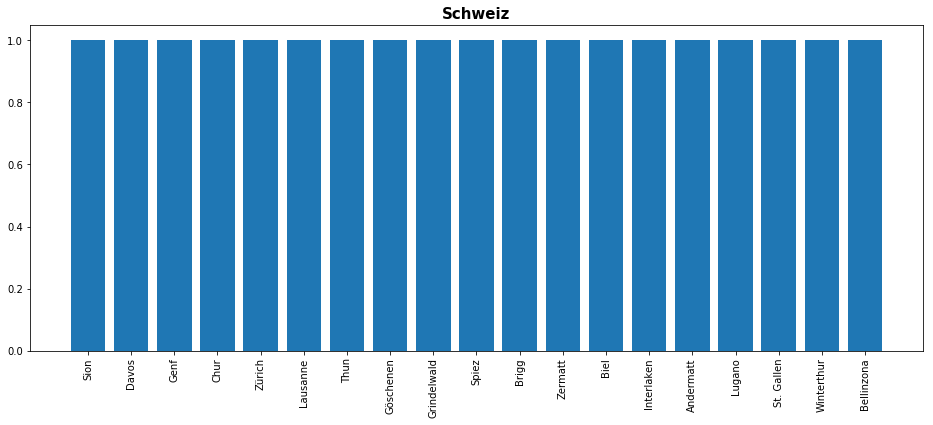

In [13]:
x_plot = np.arange(len(city_S_num))
plt.figure(figsize=(16,6))
plt.title('Schweiz', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_S_num)
plt.xticks(x_plot+1, city_S_name, rotation = 'vertical')
plt.show()

In [14]:
D_na = D.dropna(axis=0,how='any')
D_na = D_na.reset_index(drop=True)
lat_D = D_na['LATITUDE']
lon_D = D_na['LONGITUDE']
new_lat = []
new_lon = []
for i in range(len(lat_D.index)):
    new_lat.append('.'.join(lat_D[i].split(',')).rstrip('0'))
    new_lon.append('.'.join(lon_D[i].split(',')).rstrip('0'))

In [15]:
data = Data([
    Scattermapbox(
        lat=new_lat,
        lon=new_lon,
        mode='markers',
        marker=Marker(
            color='rgb(255, 0, 0)',
            opacity=0.8,
            size=10
        )
        
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=25,
            lon=11.5
        ),
        pitch=0,
        zoom=2
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Bike')